In [1]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import pickle
from sklearn.decomposition import PCA
import gc


In [0]:
positive = ['acaibowls', 'afghani', 'african','arabian', 'arcades', 'argentine',
    'armenian',  'asianfusion', 'australian', 'austrian', 'bagels', 'bakeries',
    'bangladeshi',  'barcrawl', 'bars', 'bartenders', 'basque', 'bbq', 'belgian',  
    'brasseries', 'brazilian', 'breakfast_brunch', 'breweries', 'brewingsupplies',
    'bridal', 'british', 'bubbletea', 'buffets', 'burgers', 'burmese', 'butcher',
    'cabaret', 'cafes', 'cafeteria', 'cajun', 'cambodian', 'cantonese', 'caribbean', 
    'catering',  'cheese', 'cheesesteaks', 'chicken_wings', 'chickenshop', 'chinese', 
    'chocolate',  'colombian', 'comfortfood', 'creperies', 'cuban', 'culturalcenter',  
    'czech''delis', 'desserts', 'dimsum', 'diners', 'dinnertheater', 'distilleries','diyfood', 
    'dominican', 'donuts',  'egyptian', 'empanadas', 'eritrean', 'ethiopian', 'falafel', 'farmersmarket', 
    'filipino', 'fishnchips',  'fondue', 'food', 'food_court', 'fooddeliveryservices', 'foodstands', 
    'foodtrucks', 'french', 'gamemeat', 'gastropubs', 'gelato', 'georgian', 'german',  
    'gluten_free', 'gourmet', 'greek', 'hainan', 'haitian', 'halal', 'hawaiian', 'hennaartists',
    'herbsandspices', 'himalayan', 'hkcafe', 'honduran', 'hookah_bars', 'hotdog', 'hotdogs',  'hotpot', 'iberian',  'importedfood', 
    'indonesian', 'indpak', 'internetcafe', 'intlgrocery', 'irish', 'irish_pubs', 'italian', 'izakaya', 'japacurry', 'japanese', 
    'jazzandblues', 'karaoke', 'kebab',  'kitchensupplies', 'korean', 'kosher',  'laotian', 'latin', 'lebanese', 
    'localflavor', 'macarons', 'mags', 'malaysian',  'meats', 'mediterranean', 'mexican', 'mideastern', 'modern_european', 
    'mongolian', 'moroccan',  'newamerican', 'newmexican',   'noodles', 'pakistani', 'panasian', 
    'pastashops', 'persian', 'personalchefs', 'peruvian', 'petadoption', 'petstore', 'piadina', 
    'pianobars', 'pizza', 'playgrounds', 'poke', 'polish', 'poolhalls', 'popuprestaurants', 'portuguese', 'poutineries', 'pretzels', 
    'pubs', 'puertorican', 'ramen', 'raw_food', 'restaurants', 'russian', 'salad', 'salvadoran', 'sandwiches', 
    'sardinian', 'scandinavian', 'scottish', 'seafood', 'seafoodmarkets', 'senegalese', 'servicestations', 'shanghainese', 
    'shavedice', 'sicilian', 'singaporean', 'slovakian', 'smokehouse','somali', 'soulfood', 'soup', 
    'southafrican', 'southern', 'spanish', 'srilankan', 'steak',   'sushi', 'syrian', 'szechuan', 'tacos', 'sichuan','hotpot', 
    'taiwanese', 'tapas', 'tapasmallplates',  'tea', 'teppanyaki', 'tex-mex', 'thai','themedcafes', 'tikibars', 'tobaccoshops', 
    'tradamerican', 'trinidadian', 'turkish', 'tuscan', 'uzbek', 
    'vegan', 'vegetarian', 'venezuelan',  'vietnamese', 'waffles', 'wine_bars', 'wraps']


In [0]:
directory = "/content/drive/My Drive/2019SummerResearch/Recommender-system-development-and-deployment-for-elderly-mobility-in-NYC/"
r_1_b_file = directory+"data/restaurants_information/restaurants_nyc_1_bestmatch.pyc"
r_2_b_file = directory+"data/restaurants_information/restaurants_nyc_2_bestmatch.pyc"
r_3_b_file = directory+"data/restaurants_information/restaurants_nyc_3_bestmatch.pyc"
r_4_b_file = directory+"data/restaurants_information/restaurants_nyc_4_bestmatch.pyc"
r_1_r_file = directory+"data/restaurants_information/restaurants_nyc_1_rating.pyc"
r_2_r_file = directory+"data/restaurants_information/restaurants_nyc_2_rating.pyc"
r_3_r_file = directory+"data/restaurants_information/restaurants_nyc_3_rating.pyc"
r_4_r_file = directory+"data/restaurants_information/restaurants_nyc_4_rating.pyc"
r_1_rw_file = directory+"data/restaurants_information/restaurants_nyc_1_reviewcount.pyc"
r_2_rw_file = directory+"data/restaurants_information/restaurants_nyc_2_reviewcount.pyc"
r_3_rw_file = directory+"data/restaurants_information/restaurants_nyc_3_reviewcount.pyc"
r_4_rw_file = directory+"data/restaurants_information/restaurants_nyc_4_reviewcount.pyc"

In [0]:
r_1_b = pickle.load(open(r_1_b_file,"rb"))
r_2_b = pickle.load(open(r_2_b_file,"rb"))
r_3_b = pickle.load(open(r_3_b_file,"rb"))
r_4_b = pickle.load(open(r_4_b_file,"rb"))
r_1_r = pickle.load(open(r_1_r_file,"rb"))
r_2_r = pickle.load(open(r_2_r_file,"rb"))
r_3_r = pickle.load(open(r_3_r_file,"rb"))
r_4_r = pickle.load(open(r_4_r_file,"rb"))
r_1_rw = pickle.load(open(r_1_rw_file,"rb"))
r_2_rw = pickle.load(open(r_2_rw_file,"rb"))
r_3_rw = pickle.load(open(r_3_rw_file,"rb"))
r_4_rw = pickle.load(open(r_4_rw_file,"rb"))


Merge all restaurants

In [6]:
#concatenate all lists
restaurants_list = r_1_b+r_2_b+r_3_b+r_4_b+r_1_r+r_2_r+r_3_r+r_4_r+r_1_rw+r_2_rw+r_3_rw+r_4_rw
#remove duplicates
restaurants_unique = []
for each in restaurants_list:
  if each not in restaurants_unique:
    restaurants_unique.append(each)
print("restaurants_list length:",len(restaurants_list))
print("restaurants_unique length:",len(restaurants_unique))

restaurants_list length: 47379
restaurants_unique length: 29356


In [7]:
#save memory 
del(restaurants_list)
gc.collect()

209

Conver to table

In [8]:
restaurants = pd.DataFrame.from_records(restaurants_unique)
print(restaurants.columns)

Index(['alias', 'categories', 'coordinates', 'display_phone', 'distance', 'id',
       'image_url', 'is_closed', 'location', 'name', 'phone', 'price',
       'rating', 'review_count', 'transactions', 'url'],
      dtype='object')


In [0]:
PRICE2NUM = {"$":1,"$$":2,"$$$":3,"$$$$":4,'£££':3,'££££':4}
#filter out columns with NaN
restaurants= restaurants.dropna(subset=['price'])
# print("count:",restaurants.count())
#print(restaurants.price.unique())
#['$' '$$' '$$$' '£££' '$$$$' '££££']
restaurants.price = restaurants.price.apply(lambda x: PRICE2NUM[x])

In [0]:
# convert list of dicts to list of alias in the dic
restaurants.categories = restaurants.categories.apply(lambda x:list(map(lambda cate:cate["alias"],x)))

In [11]:
# get all cateogry label
# this step can be ignored, this is how I got the original 299 category labels
# but after filtering all the 299 category labels, I got 207 valid positive words, which are at the beginning of the notebook
# from functools import reduce
# categories = restaurants.categories.tolist()
# categories = reduce(lambda x,y:x+y,categories)
# print(len(set(categories)))
# print(set(categories))

299
{'eventservices', 'bookstores', 'bartenders', 'herbalshops', 'chicken_wings', 'catering', 'mediterranean', 'desserts', 'portuguese', 'kebab', 'pretzels', 'foodstands', 'bowling', 'internetcafe', 'personalchefs', 'bagels', 'drugstores', 'eventphotography', 'eritrean', 'irish', 'herbsandspices', 'eventplanning', 'basque', 'acaibowls', 'divebars', 'farmersmarket', 'ukrainian', 'tea', 'meats', 'tikibars', 'burgers', 'french', 'barcrawl', 'cafes', 'partyequipmentrentals', 'hennaartists', 'pianobars', 'sportswear', 'privatejetcharter', 'comedyclubs', 'lounges', 'hainan', 'himalayan', 'moroccan', 'food_court', 'piadina', 'korean', 'bars', 'boattours', 'aircraftrepairs', 'empanadas', 'fishnchips', 'gourmet', 'hobbyshops', 'giftshops', 'gaybars', 'senegalese', 'german', 'wine_bars', 'russian', 'tapas', 'customcakes', 'antiques', 'african', 'food', 'musicvenues', 'spanish', 'golf', 'servicestations', 'ramen', 'festivals', 'beerbar', 'whiskeybars', 'teppanyaki', 'slovakian', 'vinyl_records', 

In [12]:
print(restaurants.categories.head())

0       [foodstands, mideastern, halal]
1                    [coffee, bakeries]
2                               [tacos]
3    [bagels, coffee, breakfast_brunch]
4                      [pizza, italian]
Name: categories, dtype: object


In [0]:
# decide if this destination doesn't qualify our criteria
# if any one of the labels fall belongs to the positive words, then it is qualified

def qualify(array, positive_words):
  for each in array:
    if each in positive_words:
      return 1
  return 0


In [0]:
# add one column, if it's qualified
restaurants["qualified"] = restaurants.categories.apply(lambda x: qualify(x,positive) )

In [15]:
#drop all unqualified destinations
restaurants = restaurants[restaurants.qualified == 1]
print(restaurants.count())

alias            27272
categories       27272
coordinates      27272
display_phone    27272
distance         27272
id               27272
image_url        27272
is_closed        27272
location         27272
name             27272
phone            27272
price            27272
rating           27272
review_count     27272
transactions     27272
url              27272
qualified        27272
dtype: int64


In [0]:
# add columns that not appear in the current categories to keep the number of labels consistent and fill with 0
def addColumns(table, current_categories,positive):
  for each in positive:
    if each not in current_categories:
      table[each] = 0
      

In [17]:
# convert category labels to one hot dummies 
onehot_categories = restaurants.categories.str.join('|').str.get_dummies()
print(len(onehot_categories.columns))

# add columns that didn't appear
current_categories = onehot_categories.columns.values.tolist()
addColumns(onehot_categories,current_categories,positive)

275


In [0]:
# make sure that the order of categories will always be the same in different dataset 
# otherwise the pca model will not know which label corresponds to which column
# and only retrive those positive words
onehot_categories = onehot_categories[positive]

In [19]:
# now only 207 columns, corresponding to the 207 positive words.
print(onehot_categories.columns)


Index(['acaibowls', 'afghani', 'african', 'arabian', 'arcades', 'argentine',
       'armenian', 'asianfusion', 'australian', 'austrian',
       ...
       'turkish', 'tuscan', 'uzbek', 'vegan', 'vegetarian', 'venezuelan',
       'vietnamese', 'waffles', 'wine_bars', 'wraps'],
      dtype='object', length=207)


In [0]:
# convert the 207 dim model to 50 dim feature matrix
# save the model
WANTED_DIM = 50
pca_model = PCA(n_components=WANTED_DIM)
pca_model.fit(onehot_categories)
filename = directory+"pca_model.sav"
pickle.dump(pca_model,open(filename,"wb"))

# 3 dimension model for visualization 
# WANTED_DIM = 3
# pca_model = PCA(n_components=WANTED_DIM)
# pca_model.fit(onehot_categories)
# filename = directory+"pca_model.sav"
# pickle.dump(pca_model,open(filename,"wb"))



In [25]:
# #read the model and get the tranformed data
# pca_loaded_model = pickle.load(open(filename, 'rb'))
# decomposed_categories = pca_loaded_model.transform(onehot_categories)
# decomposed_scores = pca_loaded_model.score(onehot_categories)
# print("score",decomposed_scores)
# print(decomposed_categories[:2,:])



#read the model and get the tranformed data
decomposed_categories = pca_model.transform(onehot_categories)
decomposed_scores = pca_model.score(onehot_categories)
print("score",decomposed_scores)
print(decomposed_categories[:2,:])

score 302.49816855847996
[[-0.11071416 -0.19164802 -0.01631326 ...  0.56531423  0.32777111
   0.24125073]
 [-0.15709024 -0.25870648 -0.33876167 ... -0.00521688 -0.0074238
  -0.01276532]
 [-0.08146243 -0.13358763 -0.00634267 ...  0.00469181  0.0017073
  -0.08713491]
 ...
 [-0.10681762 -0.14579741  0.10065993 ... -0.00591594  0.0021359
  -0.01564976]
 [-0.1253235  -0.22097312 -0.21985907 ... -0.00929002 -0.01090824
  -0.01150945]
 [-0.30974569  0.37653038  0.60073288 ...  0.10525252  0.05859426
   0.18253049]]


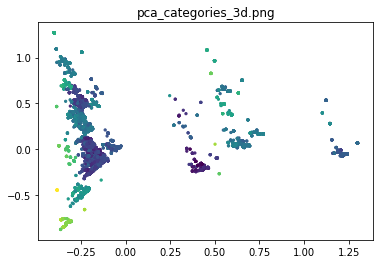

In [0]:
#if 3d
import matplotlib.pyplot as plt
plt.scatter(np.transpose(decomposed_categories)[0],np.transpose(decomposed_categories)[1],5,np.transpose(decomposed_categories)[2])
filename = "pca_categories_3d.png"
plt.title("pca_categories_3d.png")
plt.show()

In [38]:
# should reset index, otherwise the concatenated table would be wrong: with a lot of wrong values
restaurants.reset_index(drop=True, inplace=True)

arm_contexts = pd.concat([restaurants[["id","distance","rating","review_count","price"]], pd.DataFrame(decomposed_categories)] ,axis=1)
print(arm_contexts)

                           id      distance  ...        48        49
0      xEnNFXtMLDF5kZDxfaCJgA    182.040271  ...  0.327771  0.241251
1      WHRHK3S1mQc3PmhwsGRvbw    630.963506  ... -0.007424 -0.012765
2      jnEv25Y2DosTq2sNnvmC9g   3042.184636  ...  0.001707 -0.087135
3      j1S3NUrkB3BVT49n_e76NQ   1380.063518  ...  0.010769  0.004355
4      zj8Lq1T8KIC5zwFief15jg   4361.398809  ... -0.001872  0.007481
5      SULHf6nGQ8sK0UpG1XU30w    836.941254  ...  0.001707 -0.087135
6      o6q3jm-dU5A6nV3r2lBg9A   5246.304541  ... -0.010908 -0.011509
7      c3eMI4_o4dPDDhPV_ibBYQ    811.405998  ...  0.016477  0.025376
8      xJSH3EM1iZtOh4WZti4qjg   3020.238063  ...  0.115048  0.064543
9      L-IuiVoFMDSw2K6OAciP1g   3807.565768  ... -0.050218 -0.016429
10     6G_NSMacAfdf-WYOpcQ4uw   4580.565777  ...  0.001751  0.018552
11     vfYhEpp0x-DrNjC6GSJjPQ   3157.850081  ... -0.015635 -0.020140
12     j0n_poMVZnODYOFviLbh0Q   3339.704844  ... -0.060564 -0.068887
13     qVSOes5JoWc5_umv4nd4Hg   45

In [0]:
#save the arm contexts
file = directory+"arm_contexts.pyc"
pickle.dump(arm_contexts,open(file,"wb"))

In [40]:
print(arm_contexts.columns)
print(restaurants.columns)

Index([          'id',     'distance',       'rating', 'review_count',
              'price',              0,              1,              2,
                    3,              4,              5,              6,
                    7,              8,              9,             10,
                   11,             12,             13,             14,
                   15,             16,             17,             18,
                   19,             20,             21,             22,
                   23,             24,             25,             26,
                   27,             28,             29,             30,
                   31,             32,             33,             34,
                   35,             36,             37,             38,
                   39,             40,             41,             42,
                   43,             44,             45,             46,
                   47,             48,             49],
      dtype='object')